# Raster interface

In [1]:
import os
os.chdir("..")

In [2]:
import geomappy as mp
from geomappy.basemap import ProjectCustomExtent
from geomappy.colors import cmap_discrete
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cf
import cartopy.crs as ccrs
from pyproj import Proj, CRS

In [3]:
water_table_depth = mp.Raster("data/wtd.tif")

to visualise where the data is located

<GeoAxesSubplot:>

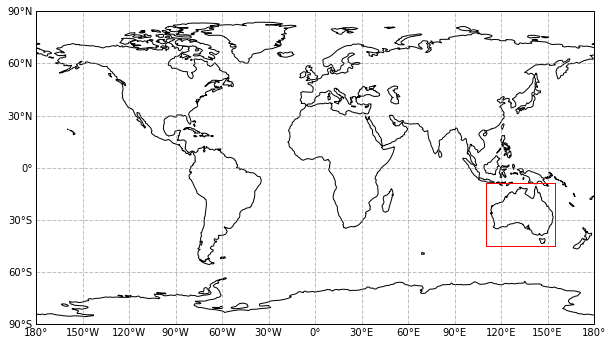

In [4]:
water_table_depth.plot_world()

splitting the data up in four tiles:

<GeoAxesSubplot:>

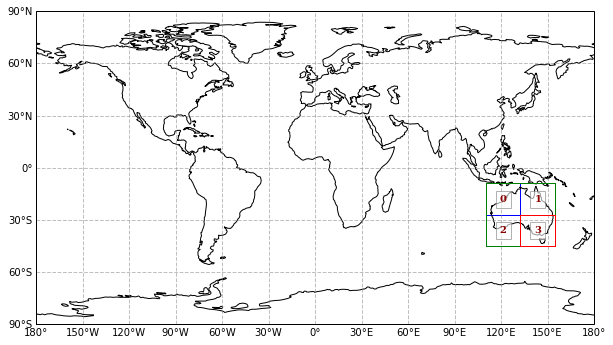

In [5]:
water_table_depth.tiles=4
water_table_depth.plot_world(ind=3, numbers=True)

obtain the data in the third tile:

In [6]:
water_table_depth[2]

array([[         nan,          nan,          nan, ..., 139.19279774,
        172.89997711, 143.0685893 ],
       [         nan,          nan,          nan, ...,  98.68009461,
        146.66971847, 110.82627604],
       [         nan,          nan,          nan, ..., 153.90249485,
        105.89761196, 134.27939269],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

direct numpy indexing with two slices

In [7]:
water_table_depth[200:400, 100:200].shape

(200, 100)

or in specific lat-lon bounds

In [8]:
water_table_depth[(120, -30, 130, -20)] #x0, y0, x1, y1

array([[29.84664683, 21.34737163, 15.97619593, ..., 23.33104448,
        21.08796826, 19.33318074],
       [26.4133669 , 19.88250553, 15.39635309, ..., 21.57625696,
        20.08087282, 18.70756085],
       [20.11139086, 17.50209812, 15.77782864, ..., 19.9282826 ,
        18.84489204, 18.24979019],
       ...,
       [64.56092164, 58.71671626, 57.69436179, ..., 19.85198749,
        20.05035477, 20.32501717],
       [69.00129702, 64.43884947, 67.49065385, ..., 19.74517433,
        19.63836118, 20.17242695],
       [77.89730678, 71.97680629, 73.16700999, ..., 21.71358816,
        20.56916152, 20.78278782]])

and this location can also be visualised on the global map using the same indices:

<GeoAxesSubplot:>

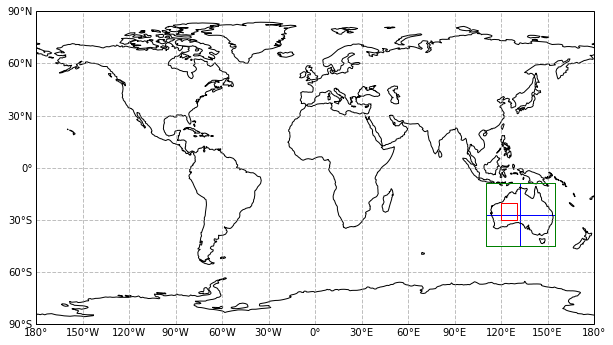

In [9]:
water_table_depth.plot_world((120, -30, 130, -20))

Displaying only the location of the file itself

<GeoAxesSubplot:>

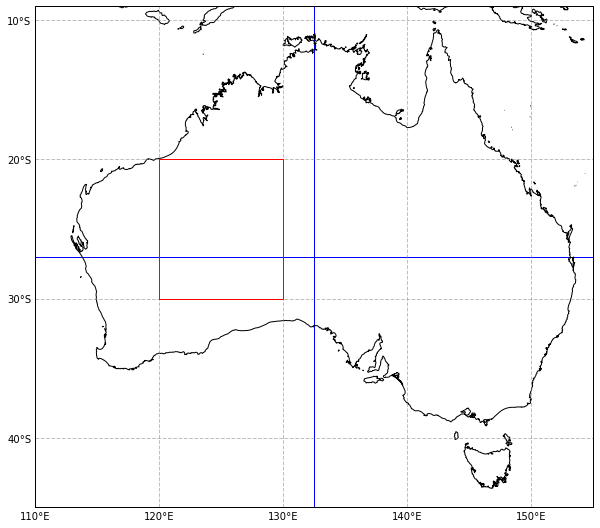

In [10]:
water_table_depth.plot_file(xticks=10, yticks=10, resolution='10m')

## Visualising the data

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fedf0ac6c40>)

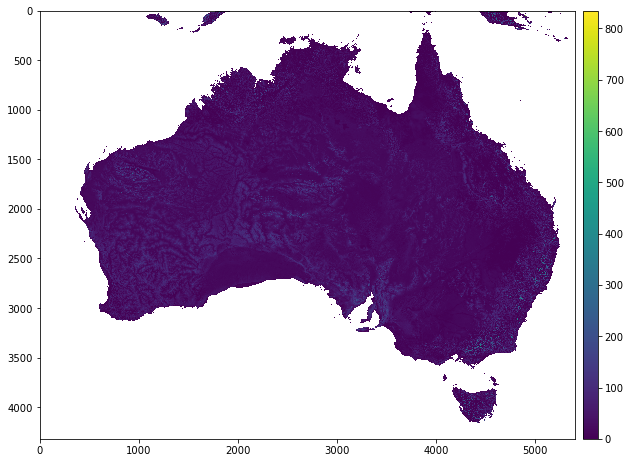

In [11]:
water_table_depth.plot_map()

This can be enhanced by adding a basemap

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fedd04d2670>)

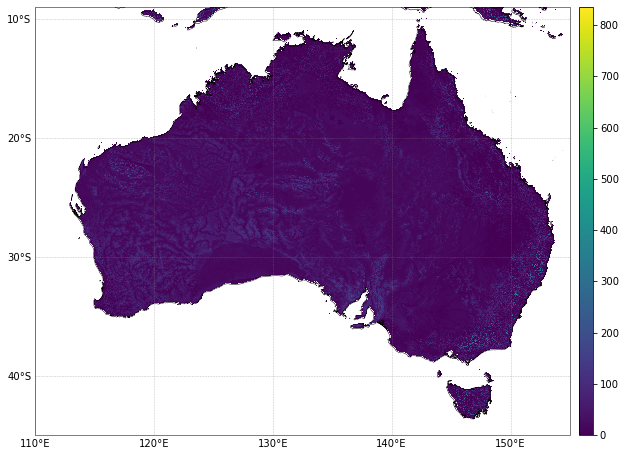

In [12]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5})

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee10b81cd0>)

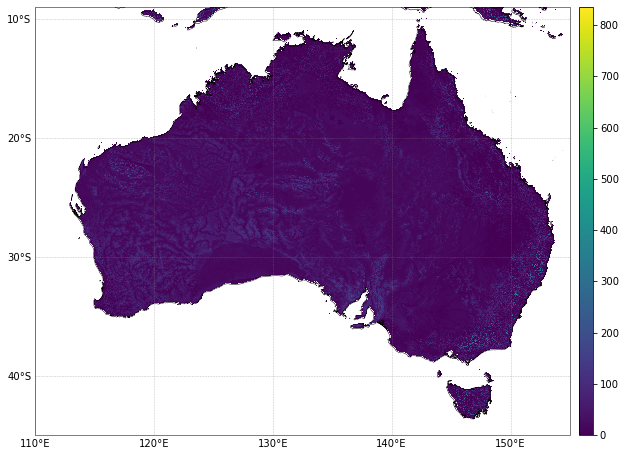

In [13]:
# Depending on the matplotlib version the default interpolation might not be the best here. 
# `nearest` often works best.
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, interpolation='none')

the standard `matplotlib` parameters for `plt.imshow` work here as well

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee01ead280>)

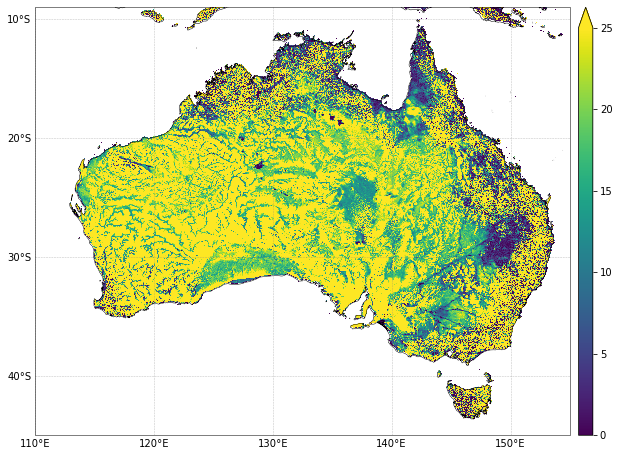

In [14]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, vmax=25)

As most values are quite close to 0, a more interesting map can be made by using the ``bin`` parameter

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee01eeb940>)

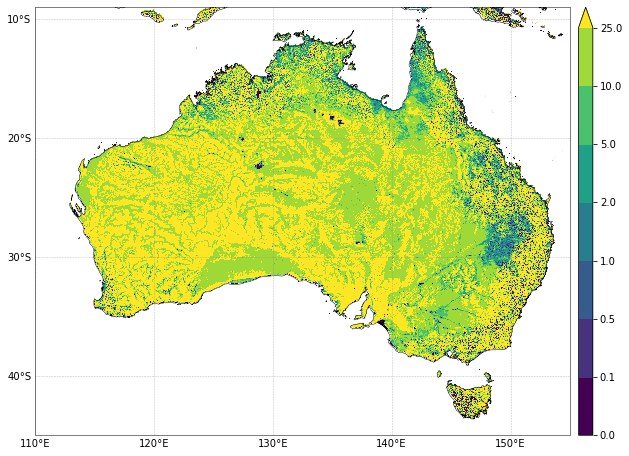

In [15]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25])

And by specifiying a more intuitive `cmap`

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fedd056eb50>)

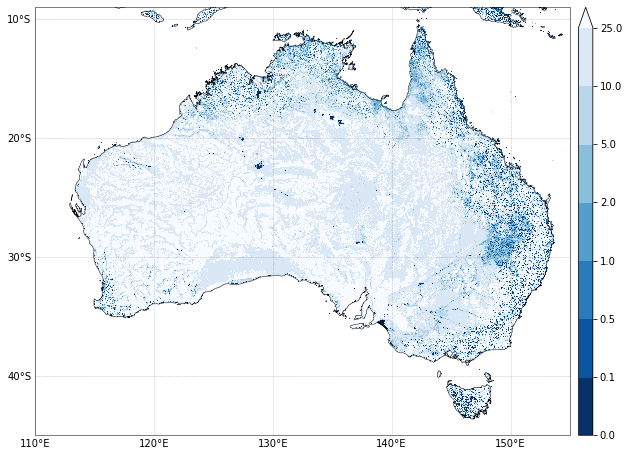

In [16]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25],
                           cmap="Blues_r")

you can also choose to have a legend instead of a colorbar

(<GeoAxesSubplot:>, <matplotlib.legend.Legend at 0x7fedc008b130>)

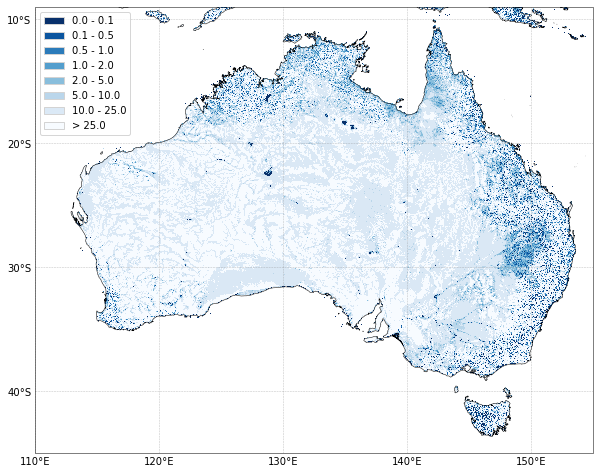

In [17]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25],
                           cmap="Blues_r", legend='legend', legend_kwargs={'loc':2})

Or none at all

(<GeoAxesSubplot:>, None)

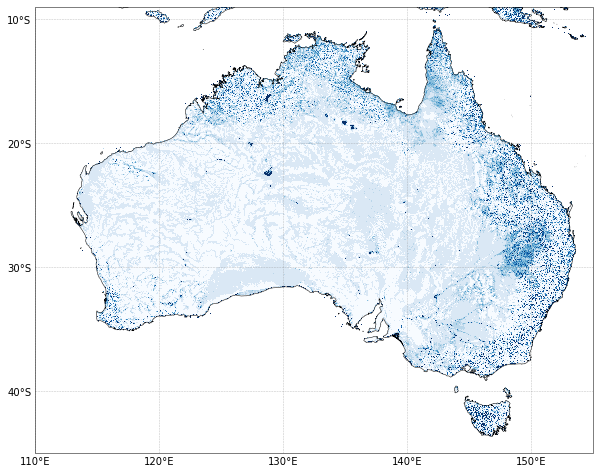

In [18]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25], 
                           cmap="Blues_r", legend=None)

maybe with a slightly different sea color

(<GeoAxesSubplot:>, None)

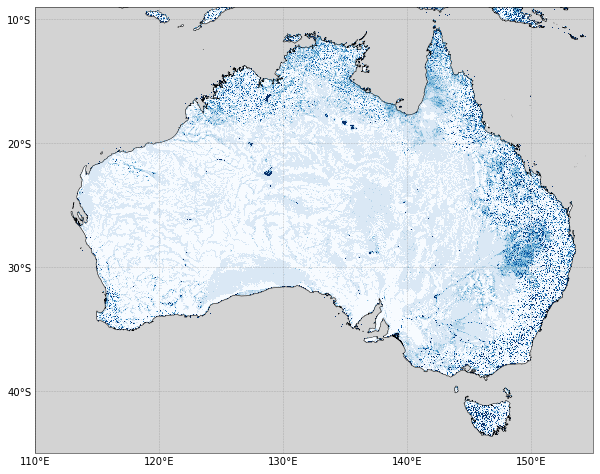

In [19]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25], 
                           cmap="Blues_r", legend=None, nan_color="lightgrey")

Or with a horizontal 'shrunken' colorbar

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee10bad6d0>)

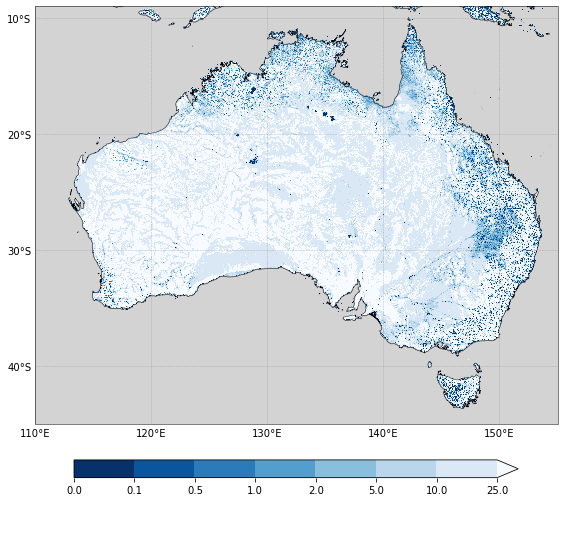

In [20]:
water_table_depth.plot_map(basemap=True, xticks=10, yticks=10, resolution='10m', 
                           basemap_kwargs={'linewidth':0.5}, bins=[0,0.1,0.5,1,2,5,10,25], 
                           cmap="Blues_r", nan_color="lightgrey", pad_fraction=2, aspect=20,
                           legend_kwargs={'position':'bottom', 'shrink':0.85})

A similar indexing approach as shown on the world maps is possible with the data as well:

(<GeoAxesSubplot:>, None)

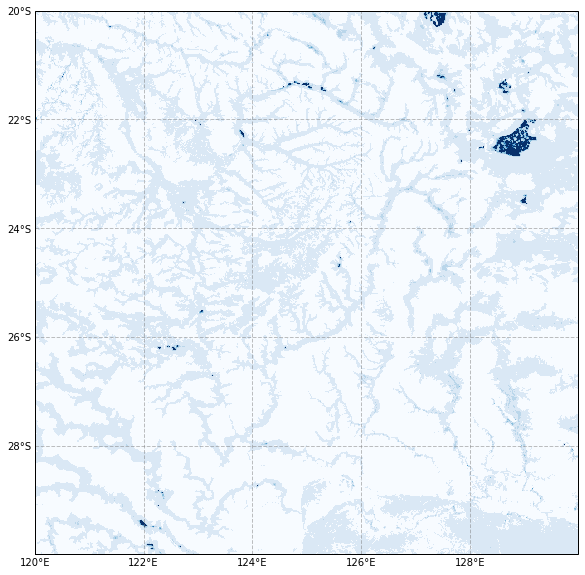

In [21]:
water_table_depth.plot_map(ind=(120, -30, 130, -20), basemap=True, 
                           xticks=2, yticks=2, resolution='10m',
                           bins=[0,0.1,0.5,1,2,5,10,25], cmap="Blues_r", legend=None)

In [22]:
water_table_depth.bounds

BoundingBox(left=109.999999342, bottom=-44.99999854499999, right=155.000000419, top=-8.999999499)

To build these plots outside the class structure for more specific control the functions are exposed separataly

In [23]:
data = water_table_depth[(120, -30, 130, -20)]

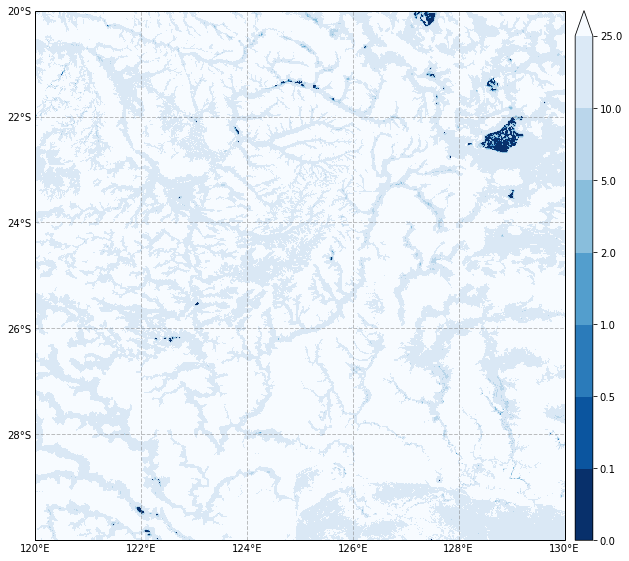

In [24]:
# create the basemap
ax = mp.basemap((120, -30, 130, -20), xticks=2, yticks=2)
# call the plotting function
mp.plot_map(data, bins=[0,0.1,0.5,1,2,5,10,25], ax=ax, legend=None, cmap="Blues_r")
# add the colorbar separately
mp.add_colorbar(ax.images[-1], extend='max')

## Another example, from EFAS
NetCDF file with 12 layers in a different projection. Here you can see the real indexing power of the package.

In [25]:
nc = mp.Raster("data/dis_2019_monthlymeans_cropped_complete.nc", tiles=(2,2))

By inspecting the object, it can be seen that three different RasterReader objects have been created that capture all variables of the file

In [26]:
nc

Set of Rasters: ['latitude', 'longitude', 'dis24']

Proj needs to be set as it Rasterio does not read it correctly
``nc.proj`` -> ``None``

All properties of RasterReader are exposed throught this interface as well

In [27]:
nc.tiles

{'latitude': (2, 2), 'longitude': (2, 2), 'dis24': (2, 2)}

In [28]:
nc.proj = Proj(3035)

Similarly to RasterReaders a world file can be plotted

<GeoAxesSubplot:>

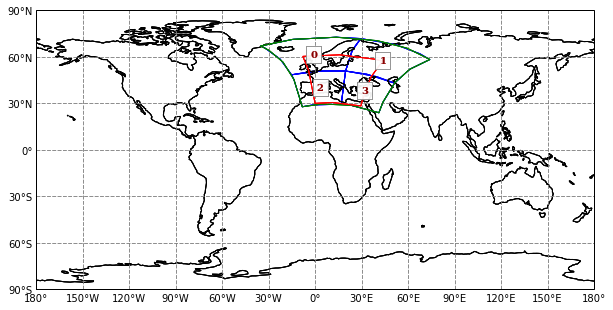

In [29]:
nc.plot_world((0,30,30,60), numbers=True)

basic plotting is supported (which plots all RasterReader objects). ``figsize`` and ``ax`` are not available, so pretty plots need to be done outside this framework. This functionality is only present for inspection

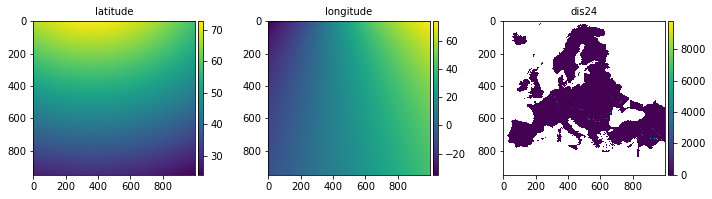

In [30]:
nc.plot() # default to indexes=1
plt.tight_layout()
plt.show()

For the rest of the examples the `dis24` RasterReader will be used, which is exposed directly through the object interface

In [31]:
nc = nc.dis24

Plotting world with it's natural projection

<GeoAxesSubplot:>

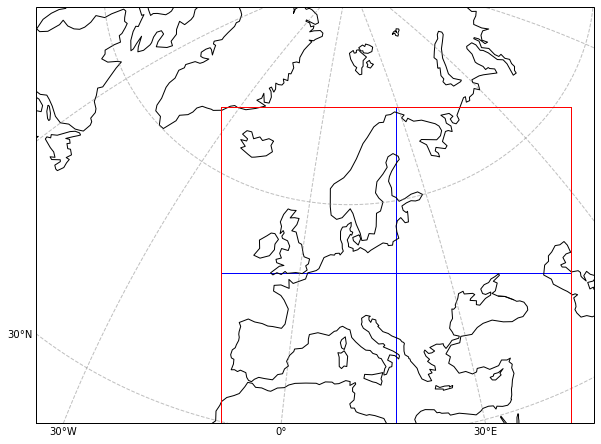

In [32]:
nc.plot_world(projection="native")
# which is equal to nc.plot_world(epsg=3035)

``plot_file`` plots the file in a similar way as ``plot_world`` with the difference that it projects in native projection and bounds

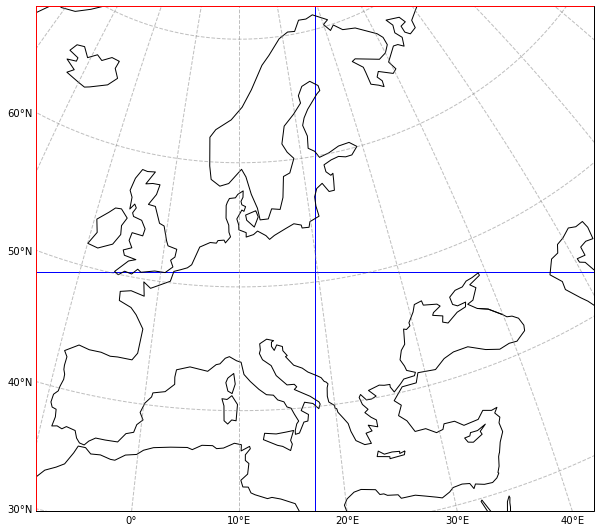

In [33]:
ax = nc.plot_file(xticks=10, yticks=10)

Get the shape of the file to see the structure

In [34]:
nc.shape

(12, 950, 1000)

this means that some indexing can be done. For example plotting the first layer and the sixth layer

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee11460610>)

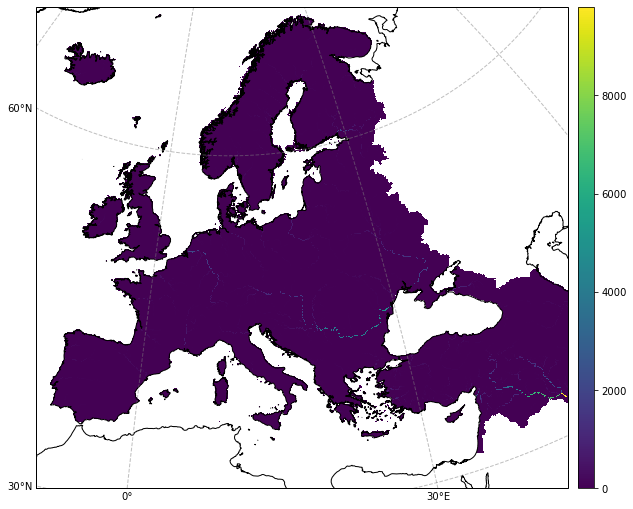

In [35]:
nc.plot_map(indexes=1, basemap=True, resolution="10m")

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fedf111a940>)

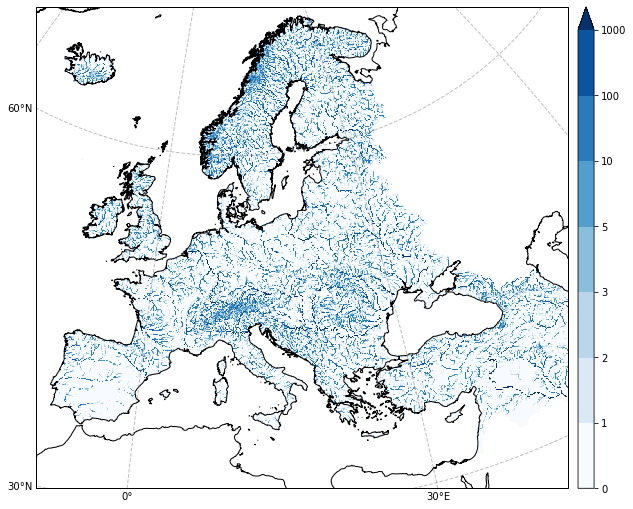

In [36]:
# more useful cmap and bins
nc.plot_map(indexes=6, basemap=True, resolution="10m",
            bins=[0,1,2,3,5,10,100,1000], cmap="Blues")

Cut it to the required bounds

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fedd0a7b790>)

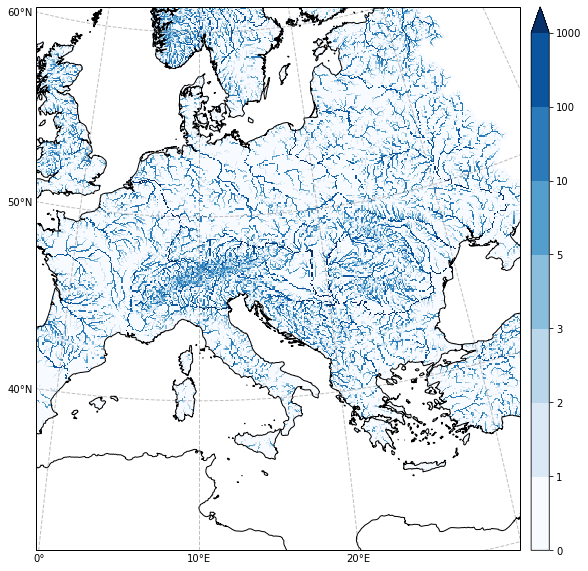

In [37]:
nc.plot_map(ind=(0,30,30,60), indexes=6, basemap=True, resolution="10m",
            bins=[0,1,2,3,5,10,100,1000], cmap="Blues", xticks=10, yticks=10)

or

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fede3999760>)

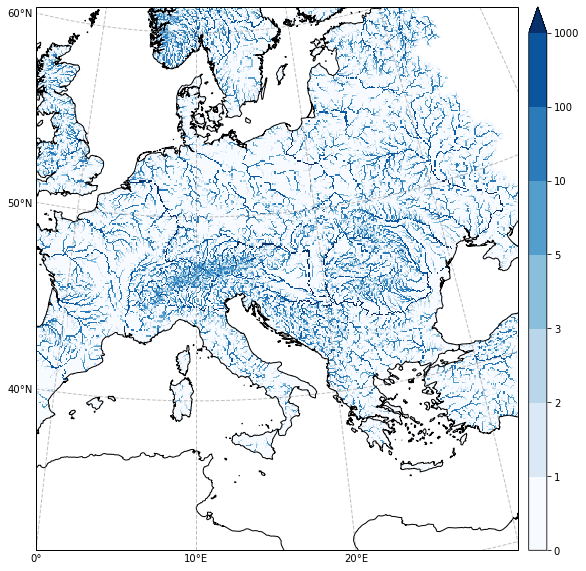

In [38]:
nc.plot_map(indexes=6, basemap=True, resolution="10m", extent=(0,30,30,60),
            bins=[0,1,2,3,5,10,100,1000], cmap="Blues", xticks=10, yticks=10)

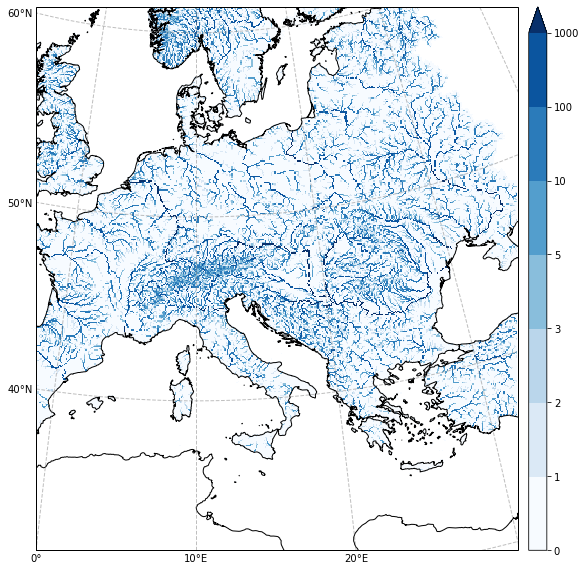

In [39]:
# The same plot can be made while using the outer functions, with more control
ind = (0, 30, 30, 60)
data = nc[ind, 6]
ax = mp.basemap(ind, xticks=10, yticks=10, resolution='10m', projection=nc.projection)
bounds = nc.get_bounds(ind)
bounds = [bounds[0], bounds[2], bounds[1], bounds[3]]
ax, legend = mp.plot_map(data, ax=ax, extent=bounds, transform=nc.projection,
                         bins=[0,1,2,3,5,10,100,1000], cmap="Blues")

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee10dd53a0>)

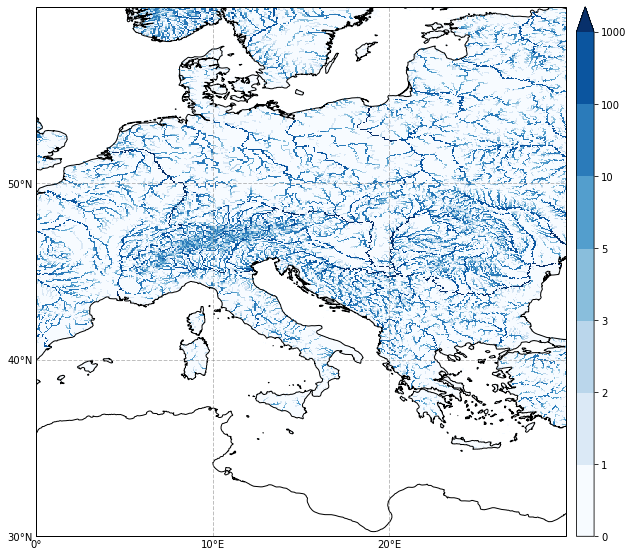

In [40]:
# in PlateCarree() projection
nc.plot_map(indexes=6, basemap=True, xticks=10, yticks=10, resolution="10m", 
            extent=(0,30,30,60), bins=[0,1,2,3,5,10,100,1000], cmap="Blues", 
            projection=None)

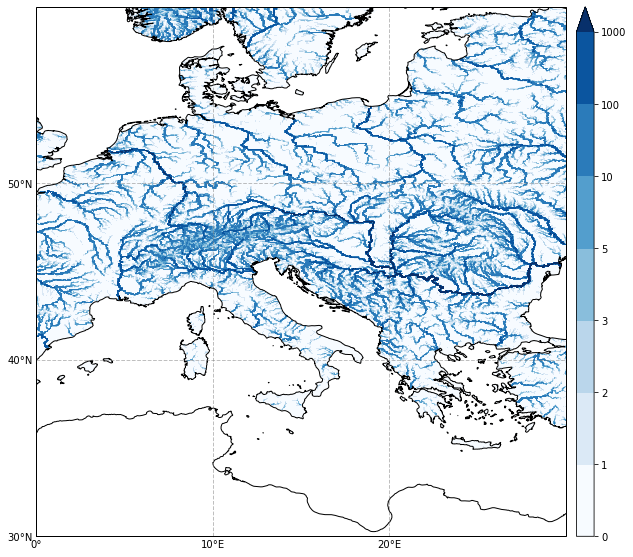

In [41]:
# The same plot can be made while using the outer functions, with more control. Including interpolation options.
ind = (0, 30, 30, 60)
data = nc[ind, 6]
ax = mp.basemap(ind, xticks=10, yticks=10, resolution='10m')
bounds = nc.get_bounds(ind)
bounds = [bounds[0], bounds[2], bounds[1], bounds[3]]
ax, legend = mp.plot_map(data, ax=ax, extent=bounds, transform=nc.projection,
                         bins=[0,1,2,3,5,10,100,1000], cmap="Blues", interpolation='hermite')

To layers are numbered 1 to n, which is sligthly confusing, but the default in rasterio.
To access different layers at a time (or several) the indexing notation can be used.
The following example load the 2nd, 3rd and 4th layer from the file. The first indexer is the same as above, it contains information on either extent (-180,-90,180,90), tile (0 to 3) or a slice that combines tiles. None takes all the data that is there on the first two dimensions

In [42]:
nc[None, (2,3,4)].shape

(3, 950, 1000)

A trick to plot different layers as RGB can be done in the following way. It looks quite spacy on this data, but on satellite data this might be quite useful.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, None)

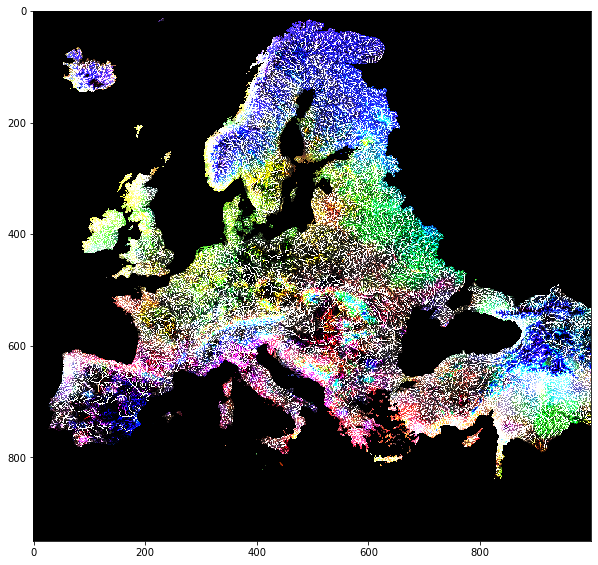

In [43]:
nc.plot_map(indexes=(2,3,4))

Most functions described in this example document can work on different layers. They use the first layer by default.

## Classified maps

this plotting routine works with continuous data but is slightly different with categorical data
in the following example, climate maps are shown which are stored as integer values in the raster

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee110db610>)

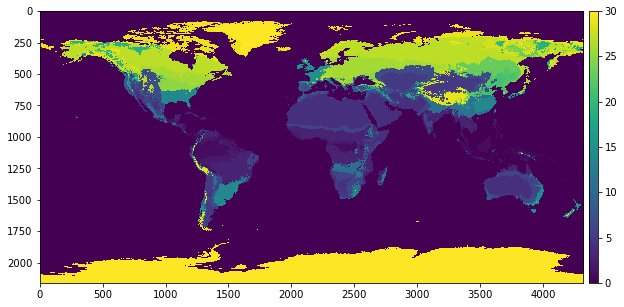

In [44]:
climate = mp.Raster("data/climate_downsampled_10_display.tif")
climate.plot_map()

to show this in a better way, with the correct labels and colors (from the paper) the function
plot_classified_maps is implemented, which works similary to plot_maps above, but requires ``colors`` 
and ``labels``

In [45]:
colors = [(1, 1, 1)]
bins = [0]
labels = ["Water"]
with open("data/koppen_legend.txt") as f:
    for line in f:
        line = line.strip()
        try:
            int(line[0])
            rgb = [int(c) / 255 for c in line[line.find('[') + 1:-1].split()]
            colors.append(rgb)
            labels.append(line.split()[1])
            bins.append(int(line[:line.find(':')]))
        except:
            pass

(<GeoAxesSubplot:>, <matplotlib.legend.Legend at 0x7fede3945790>)

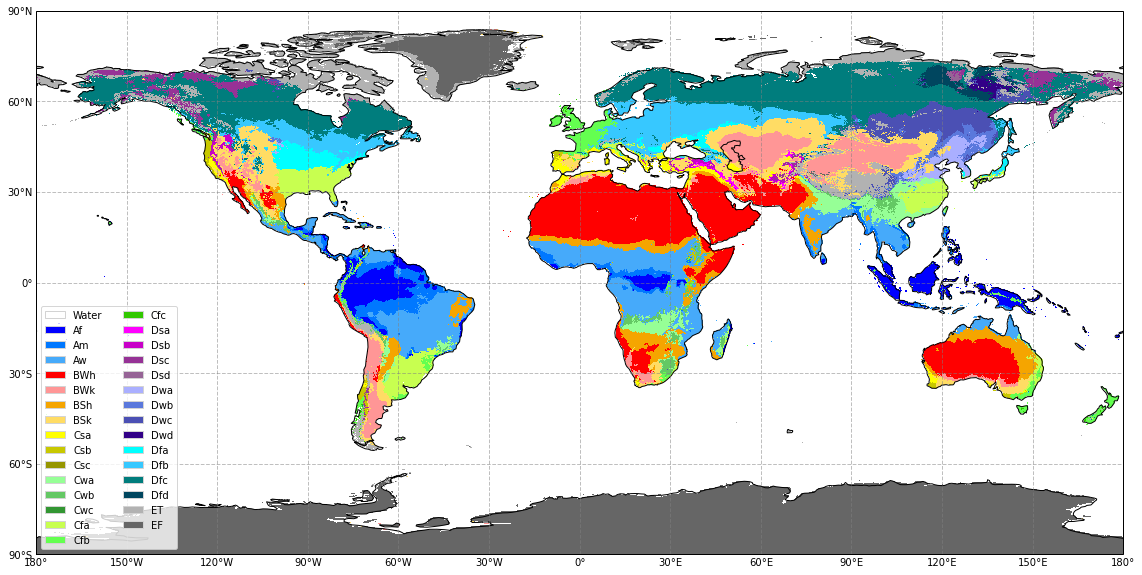

In [46]:
climate.plot_classified_map(basemap=True, bins=bins, colors=colors, labels=labels, suppress_warnings=True,
                           figsize=(20,10), legend_kwargs={'ncol':2, 'loc':3})

Alternatively the legend can be plotted as a colorbar as well if it is blocking information in the figure

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee02887e80>)

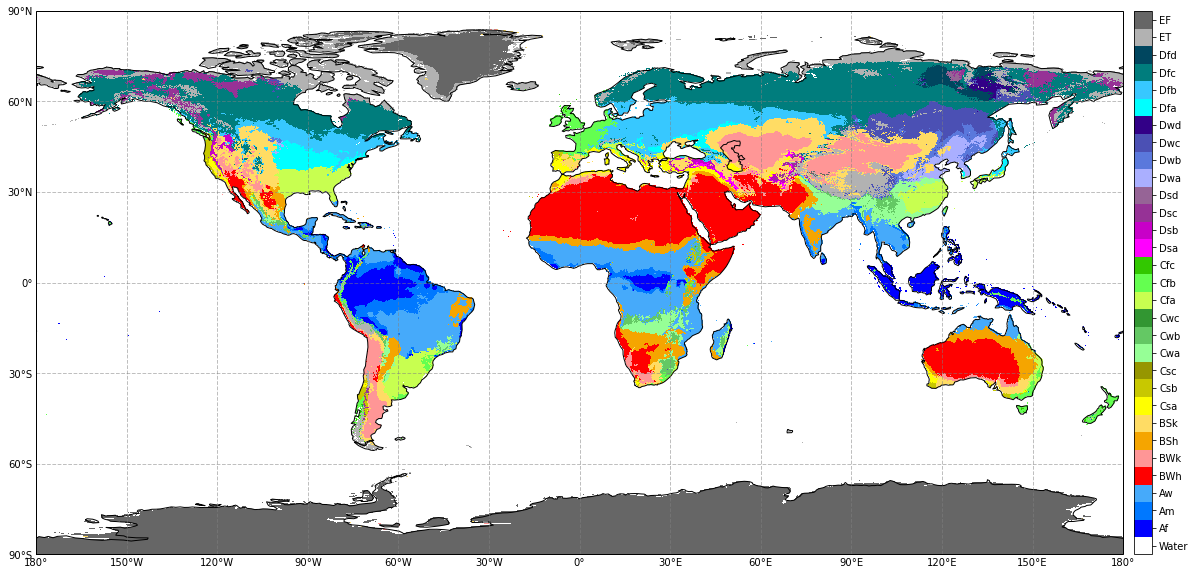

In [47]:
climate.plot_classified_map(basemap=True, figsize=(20,10), bins=bins, colors=colors, labels=labels, 
                            suppress_warnings=True, legend='colorbar')

if you are plotting an area without all classes present, it can be clipped

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fede44b2d30>)

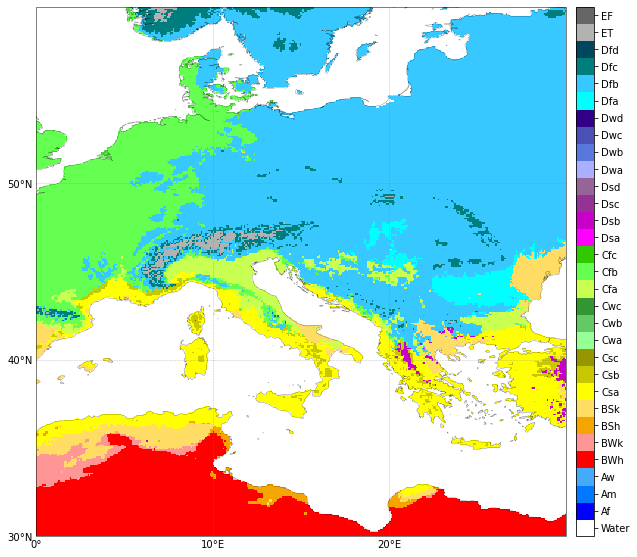

In [48]:
climate.plot_classified_map((0,30,30,60), basemap=True, xticks=10, yticks=10, resolution="10m", 
                            basemap_kwargs={'linewidth':0.5, 'coastline_linewidth':0.2}, bins=bins, 
                            colors=colors, labels=labels, suppress_warnings=True, legend='colorbar')

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fede3f9c3d0>)

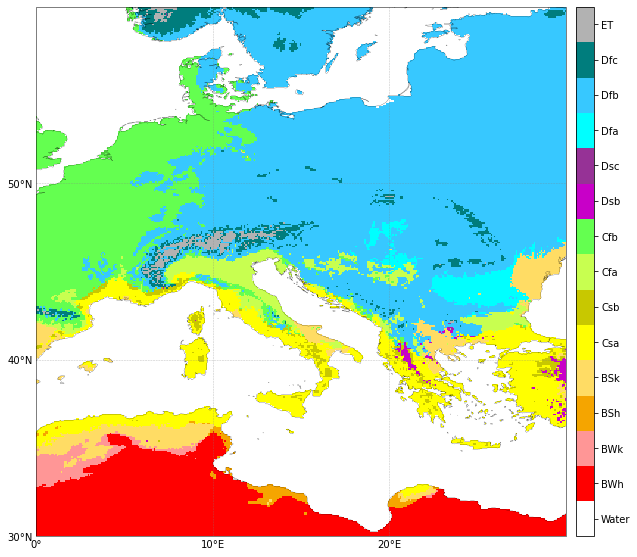

In [49]:
climate.plot_classified_map((0,30,30,60), basemap=True, xticks=10, yticks=10, resolution="10m", 
                            basemap_kwargs={'linewidth':0.5, 'coastline_linewidth':0.2}, bins=bins, 
                            colors=colors, labels=labels, suppress_warnings=True, legend='colorbar',
                            clip_legend=True)

## Plotting shapes

with a similar syntax, based on geopandas, plots can be made

In [50]:
df = gpd.read_file('data/countries/plastic_mobilisation.shp')

(<AxesSubplot:>, None)

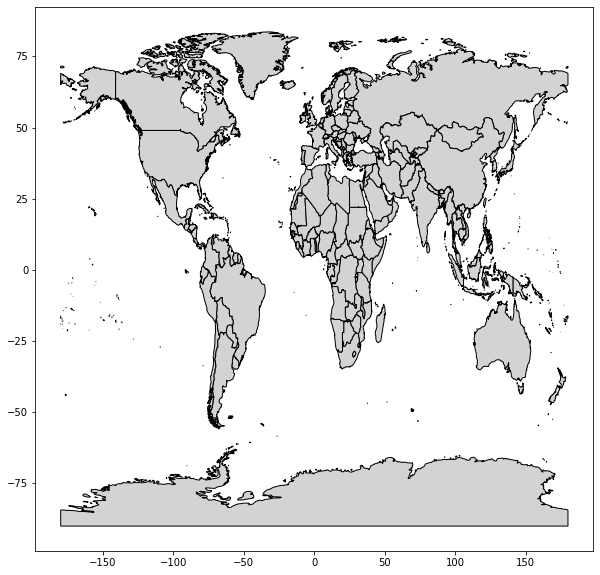

In [51]:
df.plot_shapes()

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee110b7070>)

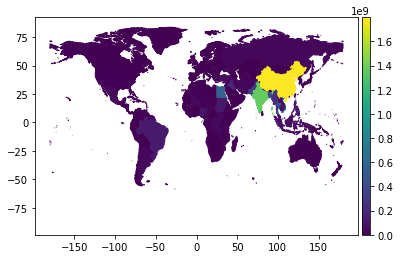

In [52]:
mp.plot_shapes(df=df, values='e_10', aspect=20)

the exact same functionality is exposed through an addon on the GeoDataFrame itself

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fede39bafa0>)

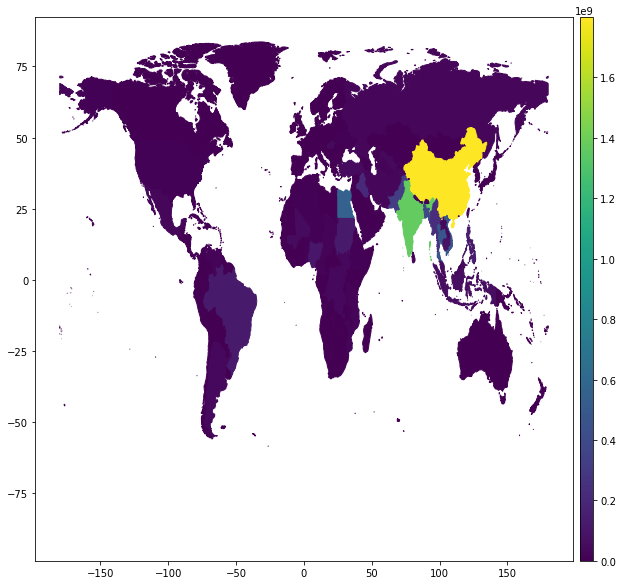

In [53]:
df.plot_shapes(values='e_10', aspect=20)

with a basemap

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fede3caa460>)

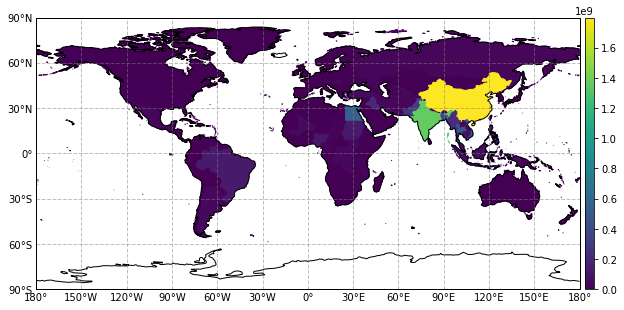

In [54]:
# creating the basemap
ax = mp.basemap(epsg=4326)
# plot the shapes
df.plot_shapes(values='e_10', ax=ax)

which can also be done internally:

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee1136d580>)

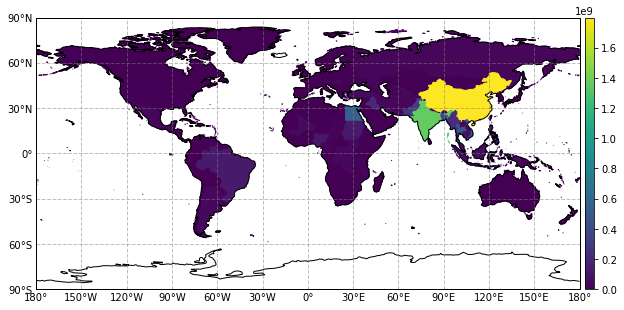

In [55]:
df.plot_shapes(values='e_10', basemap=True, bounds="global")

with a more comprehensive colorscheme and bins like above

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee02e31490>)

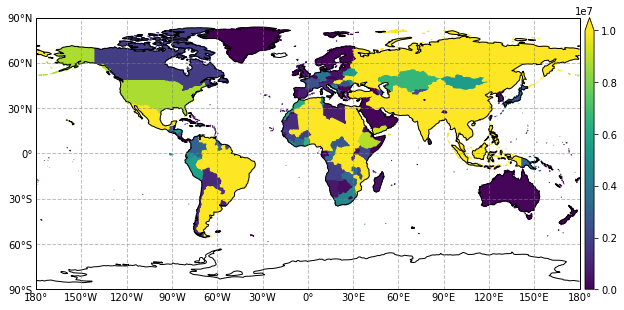

In [56]:
df.plot_shapes(values='e_10', basemap=True, bounds="global", vmax=10000000)

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fede49c7f40>)

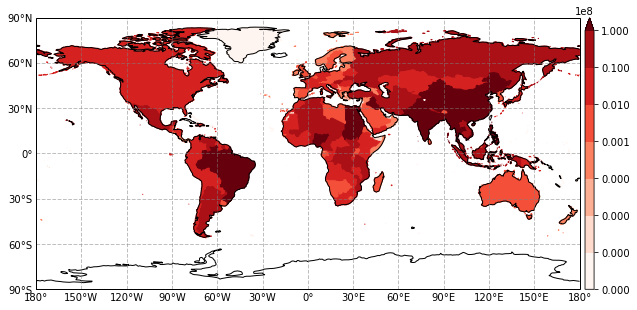

In [57]:
df.plot_shapes(values='e_10', basemap=True, bounds="global", cmap="Reds",
               bins=[0,100,1000,10000,100000,1000000, 10000000, 100000000])

The legend is hardly readible this way. Nicer would be shorten it into E notation

(<GeoAxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7fee11da5a60>)

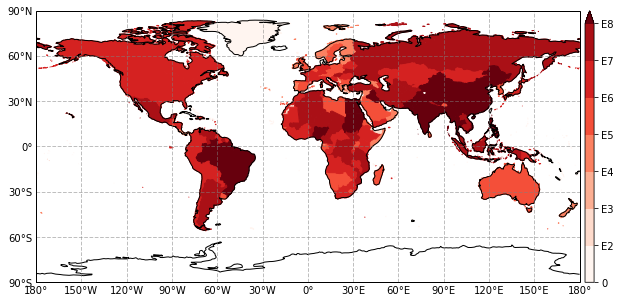

In [58]:
df.plot_shapes(values='e_10', basemap=True, bounds="global", cmap="Reds",
               bins=[0,100,1000,10000,100000,1000000, 10000000, 100000000], 
               bin_labels = [0, "E2", "E3", "E4", "E5", "E6", "E7", "E8"])

This function also accepts ``lat``, ``lon`` and arrays of ``values`` and sizes ``s``. This works only through the standalone version of the function, not the one broadcasted for the GeoDataFrame

# Classified Shapes

In [59]:
df = pd.read_csv("data/processed_data_SDN/df_hm_included.csv", index_col=0)
df_locations = gpd.read_file("data/processed_data_SDN/df_locations.geojson")

/Users/jroebroek/geomappy/geomappy/plotting.py:491: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  colors = np.array(colors)


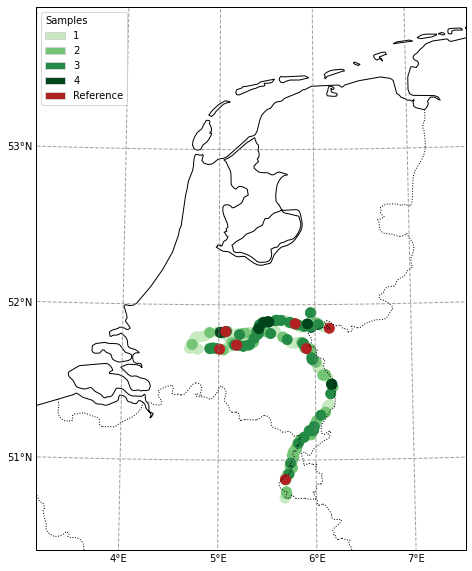

In [60]:
ax = mp.basemap((3.17, 50.4, 7.5, 53.9),
                projection=ProjectCustomExtent(epsg=28992, extent=[-1000000, 500000, -100000, 800000]),
                resolution='10m', xticks=1, yticks=1, grid_alpha=0.75)
ax.add_feature(
        cf.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m', facecolor='none', edgecolor='k'),
        label='Stereo', lw=1, linestyle=":")
ax.add_feature(cf.NaturalEarthFeature('physical', 'lakes', '10m', facecolor='none', edgecolor='black'))

temp_df = df_locations.merge(df.groupby("Gebiedscode")['granulaat_korrels'].count(),
                             left_on='Gebiedscode',
                             right_index=True)
temp_df.loc[temp_df.Gebiedscode.str.contains("REFE"), 'granulaat_korrels'] = 5
temp_df = temp_df.sort_values('granulaat_korrels', ascending=True)

ax, legend = temp_df.plot_classified_shapes(values='granulaat_korrels', s=100, ax=ax,
                          colors=cmap_discrete("Greens", 5, return_type='list')[1:].tolist()+["Firebrick"],
                          legend_kwargs={'loc': 2, 'title':"Samples", 'align_left':True}, linewidth=1,
                          labels=["1", "2", "3", "4", "Reference"])

# Multiple maps

Calling `basemap` while providing an axes will replace the axes completely with a basemap

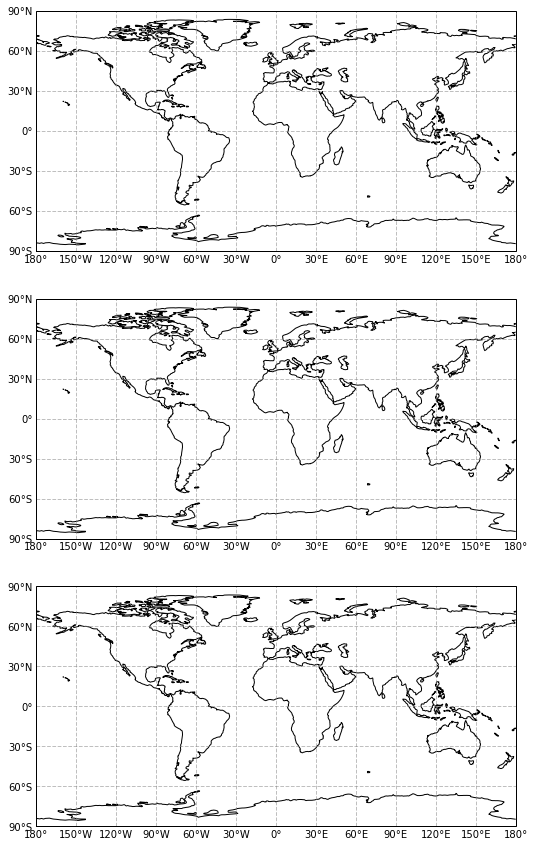

In [61]:
f, ax = plt.subplots(nrows=3, figsize=(15,15))
ax = ax.flatten()
ax = [mp.basemap(ax=cax) for cax in ax]

(<GeoAxesSubplot:>, <matplotlib.legend.Legend at 0x7fedd197f490>)

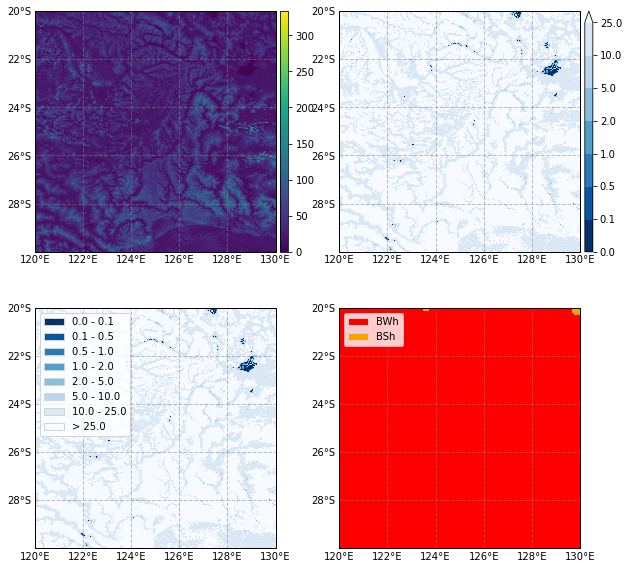

In [62]:
# Note force equal_figsize parameter in the last call. If not provided the axes 
# remains sligthly bigger and consequentially the map is slightly bigger than the others
ind = (120, -30, 130, -20)
f, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
ax = [mp.basemap(ind, ax=cax, xticks=2, yticks=2) for cax in ax]
data = water_table_depth[ind]
mp.plot_map(data, ax=ax[0])
mp.plot_map(data, ax=ax[1], bins=[0,0.1,0.5,1,2,5,10,25], cmap='Blues_r')
mp.plot_map(data, ax=ax[2], bins=[0,0.1,0.5,1,2,5,10,25], legend='legend', cmap="Blues_r", legend_kwargs={'loc':2},
            force_equal_figsize=True)
mp.plot_classified_map(climate[ind], ax=ax[3], bins=bins, colors=colors, labels=labels, 
                       suppress_warnings=True, force_equal_figsize=True, 
                       legend_kwargs={'ncol':1, 'loc':2}, clip_legend=True)

Please finish the script by closing the file pointers, which can either be done one by one by calling the objects `close` function or it can be done directly on the parent class, to close all at once:

In [63]:
mp.Raster.close()


close file: 'data/wtd.tif'
close file: 'netcdf:data/dis_2019_monthlymeans_cropped_complete.nc:latitude'
close file: 'netcdf:data/dis_2019_monthlymeans_cropped_complete.nc:longitude'
close file: 'netcdf:data/dis_2019_monthlymeans_cropped_complete.nc:dis24'
close file: 'data/climate_downsampled_10_display.tif'
